In [1]:
import random
import pandas as pd
import numpy as np
import math
import os
import sys

In [2]:
## Importing custom functions from different folder:

# Get the current directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder = 'Implementation'
data_folder = os.path.join(parent_dir, folder)

# Construct the full file path
file_ = 'utils_data'
full_path = os.path.join(data_folder, file_)
print(full_path)
print(data_folder)
sys.path.append(data_folder)  

# Load the functions from .py file  
try:
    #from utils_data import load_data, data_clustering, plot_data, cleaning_data, linear_transf
    #from utils_data import experimental_velocity, plot_velocity, saving_processed_data
    from utils_data import load_processed_data
    from utils_model import numericalSimulation, ComputeFunctional, ComputeVel
    from utils_model import generate_trajectory, plot_simulation, generate_trajectory_vel, optimize_Sigma
except ModuleNotFoundError as e:
    print("ModuleNotFoundError:", e)

/Users/flaviaferrusmarimon/UB/MAM/TFM/Codes1/MotorControlPrediction/Implementation/utils_data
/Users/flaviaferrusmarimon/UB/MAM/TFM/Codes1/MotorControlPrediction/Implementation


# Loading processed data: 

In [3]:
# Loading the processed data: 
print('Loading processed data...')
n_clusters = 4
dfx = [[] for _ in range(n_clusters)]
dfy = [[] for _ in range(n_clusters)]
for cluster in range(n_clusters): 
    dfx[cluster] = load_processed_data(folder_path='processed_data', file_name='cluster{}_dfx.csv'.format(cluster))
    dfy[cluster] = load_processed_data(folder_path='processed_data', file_name='cluster{}_dfy.csv'.format(cluster))
results = load_processed_data(folder_path='processed_data', file_name='results.csv') 

Loading processed data...


In [4]:
results

,cluster,rectx,recty,idxrule,mean_T,max_vel
0,0,[ 9.5 10.75 11.5 12.75],[6.6 7.6 3.1 4.1],"[1814, 1404, 1654, 1791, 1291, 1672, 1632, 171...",1.319448,0.005534
1,1,[-12. -13.25 -10. -11.25],[-3.25 -4.25 -6.75 -7.75],"[1698, 1554, 1868, 1708, 1313, 1274, 1455, 141...",1.295982,0.005831
2,2,[11.5 12.75 9.5 10.75],[ 1.75 0.75 -1.75 -2.75],"[1487, 1293, 1305, 1366, 1198, 1132, 1353, 128...",1.251862,0.004535
3,3,[ -9.5 -10.75 -11.5 -12.75],[ 3. 4. -0.5 0.5],"[2042, 1197, 1369, 1063, 1131, 1495, 1305, 112...",1.304000,0.004591


# Parameter fitting: 

## Computing trajectories for optimized velocity for each cluster

Computing trajectory with optimized velocity for cluster:  0


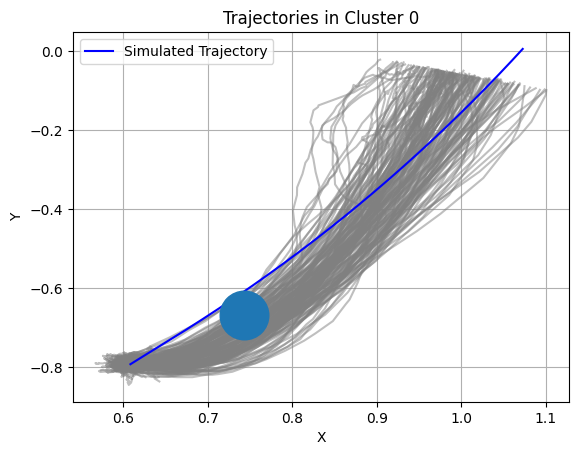

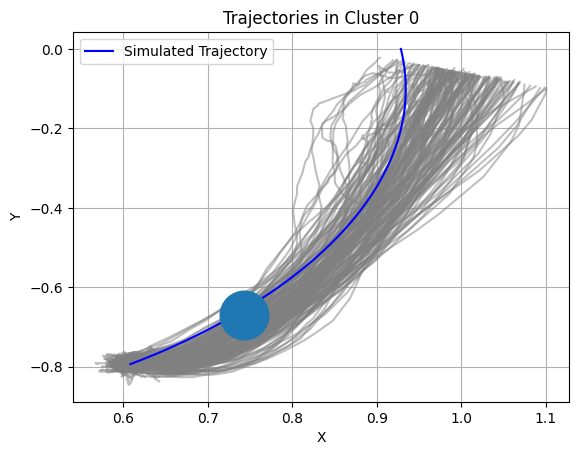

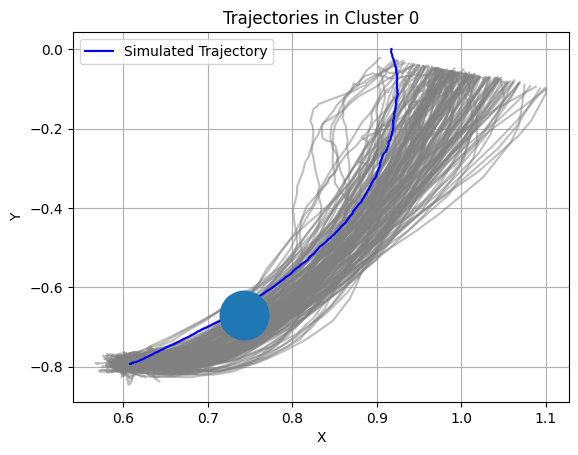

Parameters estimated:
[ 2.95749222  3.05271805 -3.21789397] 0.27243061639444527
Computing trajectory with optimized velocity for cluster:  1


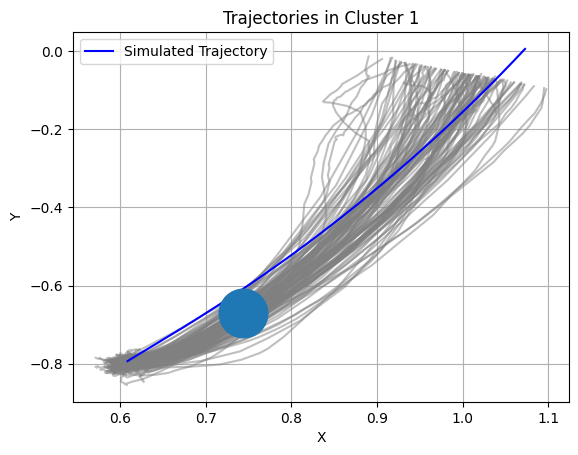

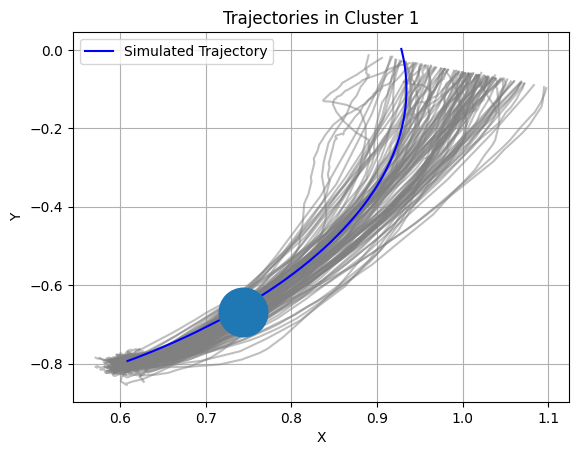

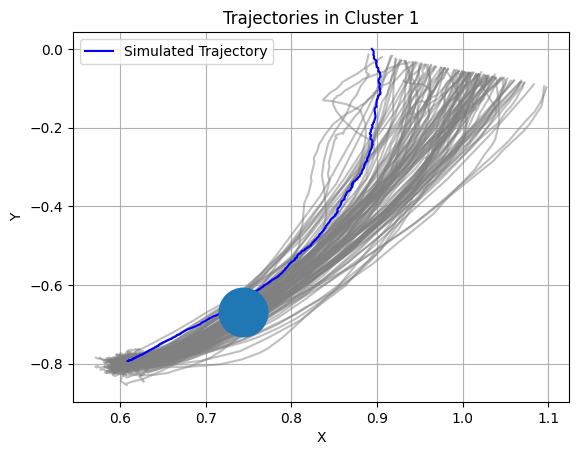

Parameters estimated:
[ 2.96624475  3.0617932  -3.22741432] 0.3815129361113957
Computing trajectory with optimized velocity for cluster:  2


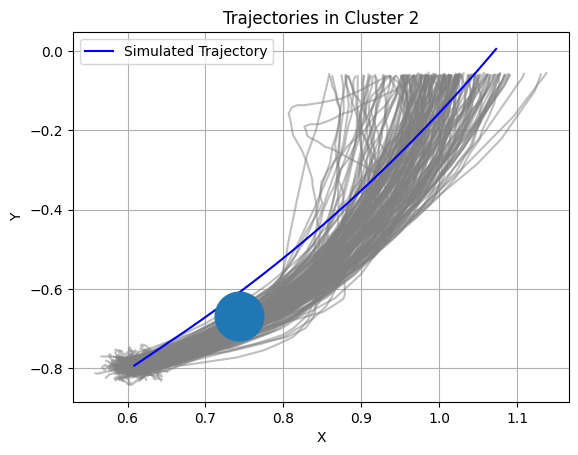

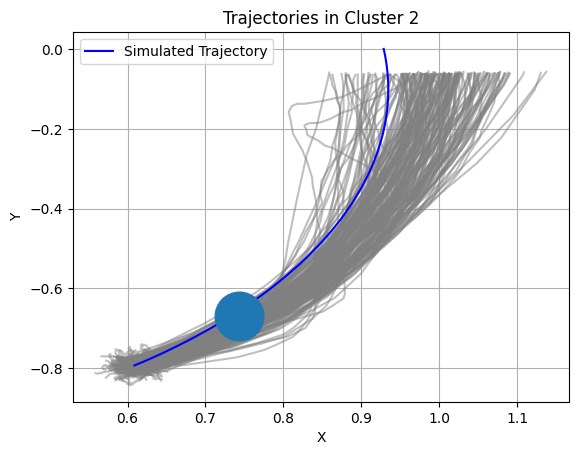

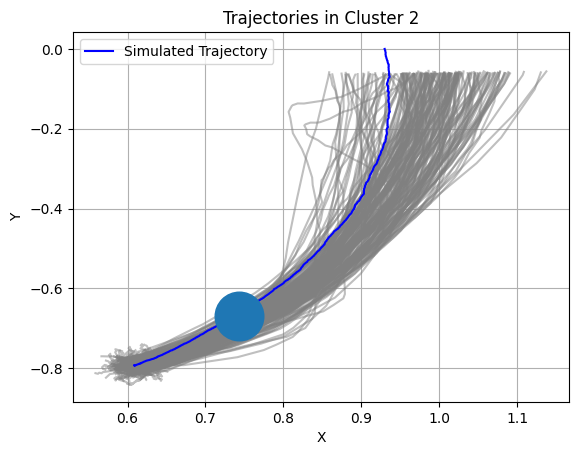

Parameters estimated:
[ 2.95038819  3.04836258 -3.21082698] 0.29682106532693353
Computing trajectory with optimized velocity for cluster:  3


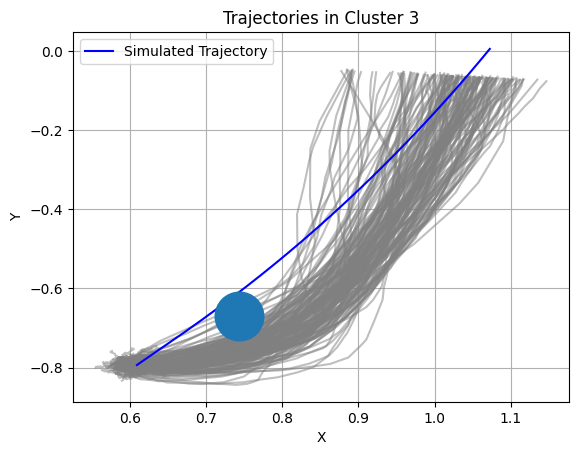

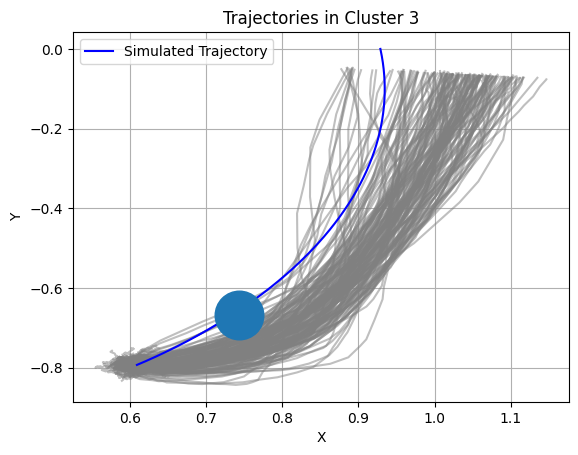

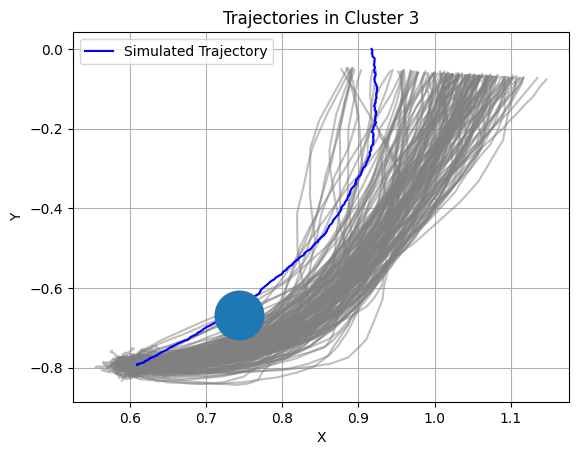

Parameters estimated:
[ 2.93367308  3.03112578 -3.18704439] 0.3725986486762996


In [4]:
new_params = [[] for _ in range(n_clusters)]
opt_sigma = [[] for _ in range(n_clusters)]

for cluster in range(n_clusters):
    print('Computing trajectory with optimized velocity for cluster: ', cluster)
    
    ## Generate the optimal trajectory by optimizing the Functional in terms of the time T 
    x, y, T = generate_trajectory(plotting = False)
    plot_simulation(x, y, dfx[cluster], dfy[cluster], 
                    cluster = cluster, pic_name = 'Trajectories_optFunctional', 
                    saving_plot = False)
    
    ## Generate the optimal trajectory with the time provided from optimizing the Functional 
    # by optimizing the velocity in terms of the parameters (alpha, epsilon, gamma)
    x_, y_, new_params[cluster] = generate_trajectory_vel(plotting = False, 
                                 T = T,
                                 vel = results[results['cluster'] == cluster].max_vel.values[0])
    plot_simulation(x_, y_, dfx[cluster], dfy[cluster], 
                    cluster = cluster, pic_name = 'Trajectories_optVel', 
                    saving_plot = False)
    
    ## Generate the optimal trajectory with the optimum stopping time and parameters
    # by optimizing the Kolmogorov Sirnov estimate in terms of the sigma
        # Converting idxrule to array from string
    idxr = results[results['cluster'] == cluster].idxrule.values[0]
    idxrule = np.fromstring(idxr[1: -1], dtype = int, sep = ', ')
    
    x__, y__, opt_sigma[cluster] = optimize_Sigma(dfx[cluster] , dfy[cluster],
                                         idxrule = idxrule, 
                                         new_params = new_params[cluster])
    plot_simulation(x__, y__, dfx[cluster], dfy[cluster], 
                    cluster = cluster, pic_name = 'Trajectories_optSigma', 
                    saving_plot = False)
    
    print('Parameters estimated:')
    print(new_params[cluster].x, opt_sigma[cluster].x)
    

Computing trajectory with optimized velocity for cluster:  0


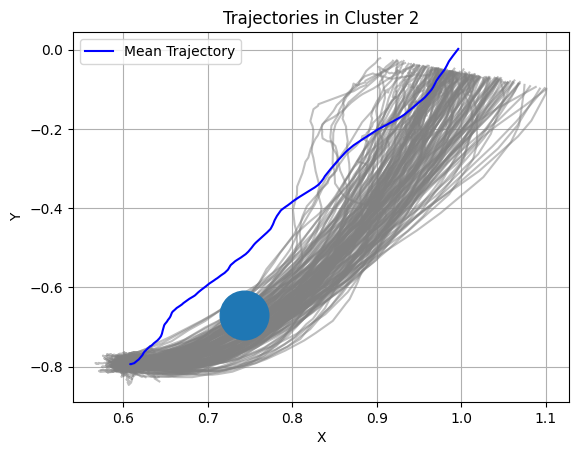

[ 2.95749222  3.05271805 -3.21789397]
0.7558014051808024
Computing trajectory with optimized velocity for cluster:  1


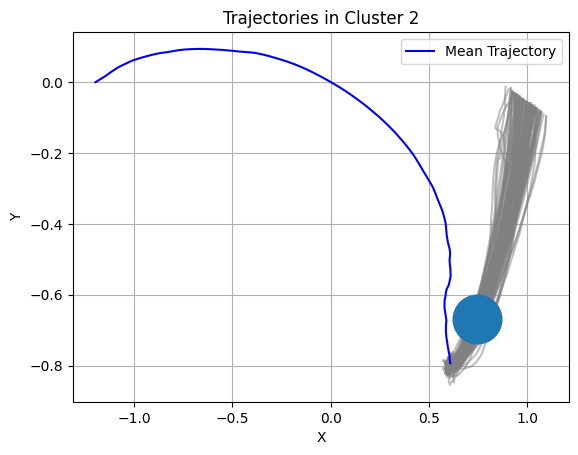

[ 2.96624475  3.0617932  -3.22741432]
1.7082039351753173
Computing trajectory with optimized velocity for cluster:  2


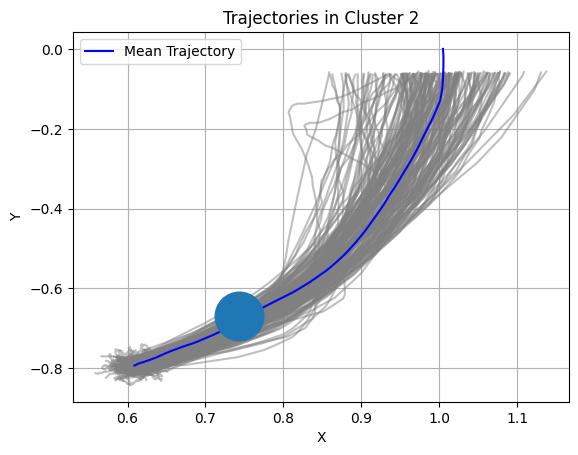

[ 2.95038819  3.04836258 -3.21082698]
0.20190615877745202
Computing trajectory with optimized velocity for cluster:  3


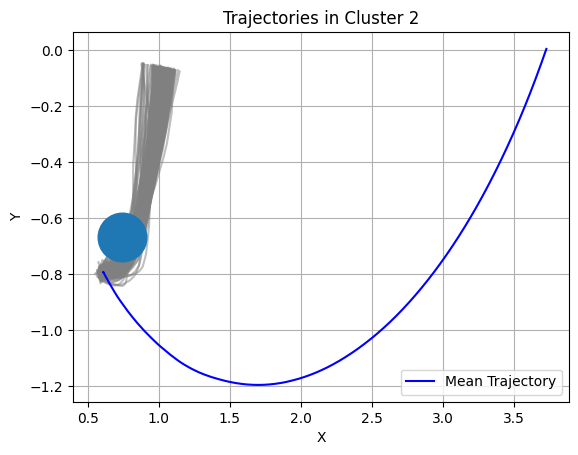

[ 2.93367308  3.03112578 -3.18704439]
2.1110030818871377


In [20]:
random.seed(10)
for cluster in range(n_clusters):
    print('Computing trajectory with optimized velocity for cluster: ', cluster)
    idxr = results[results['cluster'] == cluster].idxrule.values[0]
    idxrule = np.fromstring(idxr[1: -1], dtype = int, sep = ', ')
    
    x__, y__, opt_sigma[cluster] = optimize_Sigma(dfx[cluster] , dfy[cluster],
                                         idxrule = idxrule, 
                                         new_params = new_params[cluster])
    plot_simulation(x__, y__, dfx[cluster], dfy[cluster], 
                    cluster = cluster, pic_name = 'Trajectories_optSigma', 
                    saving_plot = True)
    print(new_params[cluster].x)
    print(opt_sigma[cluster].x)

In [15]:
for cluster in range(n_clusters):
    print('T= ', results[results['cluster'] == cluster].mean_T.values[0])
    print('vel max = ', results[results['cluster'] == cluster].max_vel.values[0])

T=  1.3194476744186048
vel max =  0.005533595198047
T=  1.295981981981982
vel max =  0.0058314025611669
T=  1.2518622448979593
vel max =  0.0045350669053802
T=  1.304
vel max =  0.00459064956602


# FUNCTIONS

In [16]:
import matplotlib.pyplot as plt
import scipy

def plot_trajectory(x, y, showing = True, via = True, plot_title = 'Mean Trajectory'): 
    plt.plot(x,y,color='blue', label=plot_title, alpha = 1)
    if via:
        angle=math.pi*7/24
        T_1=.2
        plt.plot(np.cos(angle*(T_1-1)),np.sin(angle*(T_1-1)),marker='o',markersize=35)
    if showing: 
        plt.show()

def ComputeVel(parameters, vel = 0.1, T = 1.3, sigma = 0, gamma = 0.5, epsilon = 0.1, alpha = 0.5, timestep=1/500):
    
    gamma, epsilon, alpha = parameters
    parameters2 = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371)
    x, y, v, w, ux, uy, T2= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
    
    vel_max = np.max(np.sqrt(np.square(v) + np.square(w)))
    
    return (T2 - T)**2 + (vel_max - vel)**2

def generate_trajectory(params = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371), 
                        sigma = 0, gamma = 0.5, epsilon = 0.1, alpha = 0.5, timestep=1/500, 
                        plotting = True):
    '''
        Function that computes and plots the trajectory for the initial given parameters 
        (control function and lagrange multipliers) found by optimizing the functional in 
        terms of the parameters. For fixed values of sigma, gamma, epsilon and alpha.
    ''' 
    initial_cond = scipy.optimize.minimize(ComputeFunctional, params, args=(), method=None)
    parameters = initial_cond.x
    x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )
    if plotting: 
        plot_trajectory(x,y, showing = True)
    return x, y, T

def generate_trajectory_vel_(params=(0.5, 0.5, 0.5), 
                             parameters=(3.7, -0.15679707, 0.97252444, 0.54660283, -6.75775885, -0.06253371), 
                             sigma=0, timestep=1/500, plotting=True, T=1.3, vel=0.1):
    '''
    Function that computes and plots the trajectory for the initial given parameters 
    (sigma, gamma, epsilon and alpha) found by optimizing the velocity in 
    terms of the parameters. 
    ''' 
    # Define a partial function to pass additional arguments to ComputeVel
    partial_compute_vel = lambda params: ComputeVel(params, vel=vel, T=T, sigma=sigma)
    
    # Use scipy.optimize.minimize with the partial function
    new_params = scipy.optimize.minimize(partial_compute_vel, params, args=(), method=None)
    gamma, epsilon, alpha = new_params.x
    
    # Call numericalSimulation with the optimized parameters
    x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters[:2], l_0 = parameters[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = True, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1
                        )
    # Plot trajectory if required
    if plotting: 
        plot_trajectory(x, y, showing=True)
    
    return x, y


## Numerical simulation

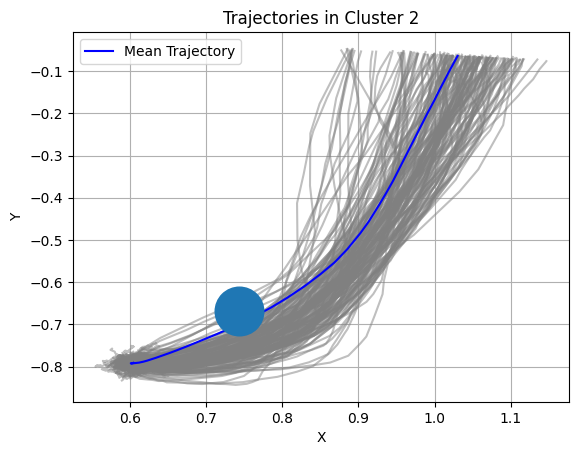

In [32]:
plot_simulation(rotated_dfx[cluster].mean(axis = 0), rotated_dfy[cluster].mean(axis = 0), rotated_dfx[cluster], rotated_dfy[cluster])